C:\Users\Nepj1\AppData\Local\Temp\ipykernel_14012\2100263379.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


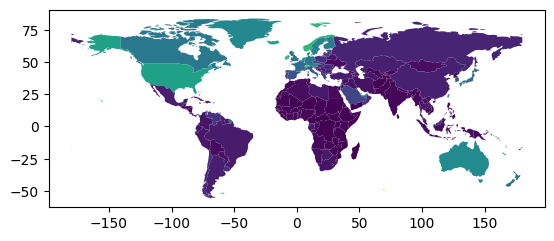

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')
plt.show()

C:\Users\Nepj1\AppData\Local\Temp\ipykernel_14012\1448591294.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Nepj1\AppData\Local\Temp\ipykernel_14012\1448591294.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Nepj1\AppData\Local\Temp\ipykernel_14012\1448591294.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['centroid_column'] = data.

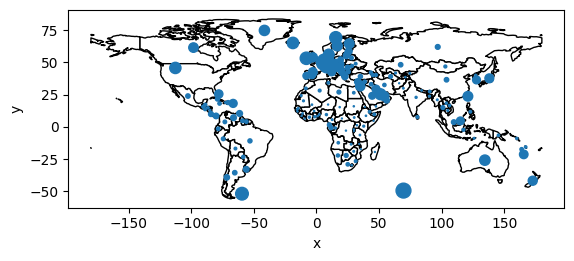

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

data = data[(data.pop_est > 0) &(data.name != 'Antarctica')]
data['centroid_column'] = data.centroid
data['gdp_per_cap'] = data.gdp_md_est / data.pop_est

centroids = list(data['centroid_column'])
df = pd.DataFrame({
    'y':[centroids[i].y for i in range(len(centroids))],
    'x':[centroids[i].x for i in range(len(centroids))],
    'data':list(data['gdp_per_cap'])})
base = world.plot(color='white', edgecolor='black')
df.plot(kind='scatter', x='x', y='y', s=df['data']*1000, ax=base)
plt.show()

In [3]:
import libpysal
import numpy as np
from esda.moran import Moran

f = libpysal.io.open(libpysal.examples.get_path("stl_hom.txt"))
y = np.array(f.by_col['HR8893'])
w = libpysal.io.open(
libpysal.examples.get_path('stl.gal')).read()

mi = Moran(y, w, two_tailed=False)
print(mi.I)

0.24365582621771692
